### Following data has been taken from Kaggle's State Farm Distracted Driver Detection challenge. There are 102150 total images. Of these 22424 training images and 79726 are training images. The training data is divided into 10 categories (folders) as mentioned below. The images are coloured and have 640 x 480 pixels each as shown below.
#### Our aim is to classify the input image into any of the below categories and predict if the driver is distracted or not.
##### The 10 classes to predict are:
- c0: safe driving
- c1: texting - right
- c2: talking on the phone - right
- c3: texting - left
- c4: talking on the phone - left
- c5: operating the radio
- c6: drinking
- c7: reaching behind
- c8: hair and makeup
- c9: talking to passenger

-- Please download the data from the link given below:
       https://www.kaggle.com/c/state-farm-distracted-driver-detection/data

In [71]:
import pandas as pd
%pylab inline
import sys
sys.path.append('..')
import random 
import cv2
import os
import os.path

Populating the interactive namespace from numpy and matplotlib


c:\users\sayali\appdata\local\programs\python\python37\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [75]:
df = pd.read_csv("driver_imgs_list.csv")

In [76]:
df.head(10)

subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg
5    p002        c0   img_3370.jpg
6    p002        c0  img_67639.jpg
7    p002        c0  img_58560.jpg
8    p002        c0  img_35779.jpg
9    p002        c0  img_10012.jpg

In [16]:
print("Total training images: ", df.shape[0])

Total training images:  22424


Total number of training examples: 22424

In [39]:
data_distribution = df.groupby(['classname']).img.agg('count').to_frame('no_of_samples').reset_index()

In [40]:
classes = list(data_distribution['classname'])
no_of_samples = list(data_distribution['no_of_samples'])
data_distribution

classname  no_of_samples
0        c0           2489
1        c1           2267
2        c2           2317
3        c3           2346
4        c4           2326
5        c5           2312
6        c6           2325
7        c7           2002
8        c8           1911
9        c9           2129

In [115]:
bars = ('c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9')
y_pos = np.arange(len(bars))

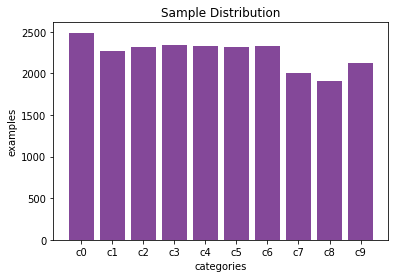

In [116]:
plt.bar(y_pos, no_of_samples, color = (0.4,0.1,0.5,0.8)) #, color = (0.5,0.1,0.5,0.6)
plt.title('Sample Distribution')
plt.xlabel('categories')
plt.ylabel('examples')
# plt.ylim(0, 3500)
plt.xticks(y_pos, bars)
plt.show()

In [84]:
folder_path = 'train/'

In [79]:
# images = list(df.loc[df['classname'] == 'c0']['img'])
# for img in images:


In [78]:
def display_image(folder_path, classname):
    images = list(df.loc[df['classname'] == classname]['img'])
    sample_images = random.sample(range(len(images)), 10)
    i = 1
    for img in sample_images:
        fig = figure(0, (20,10))
        fig.add_subplot(2,5,i)
        im = imread(folder_path + classname + '/' + images[img])
        imshow(im)
        i+=1    

## Sample images of safe driving:

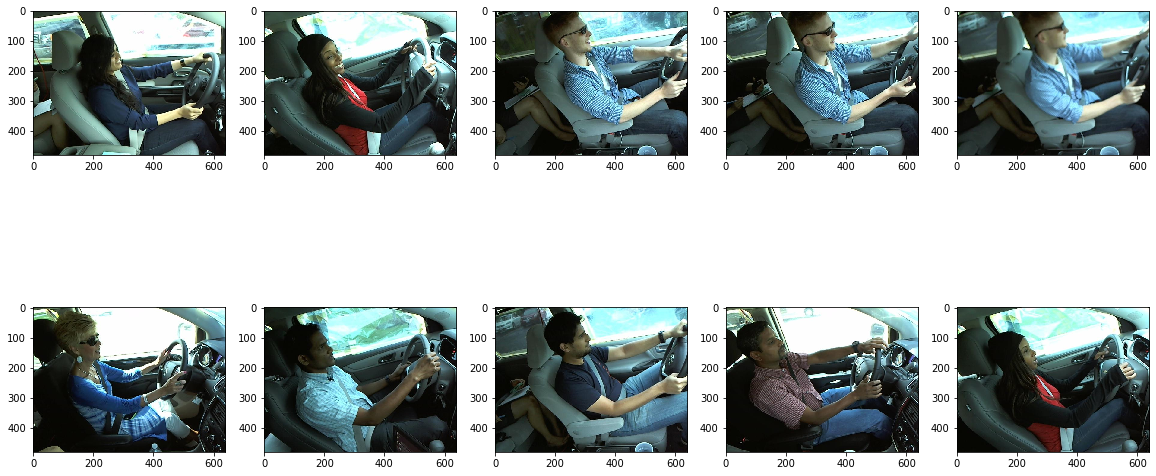

In [145]:
display_image(folder_path, 'c0')

## Sample images of texting - right:

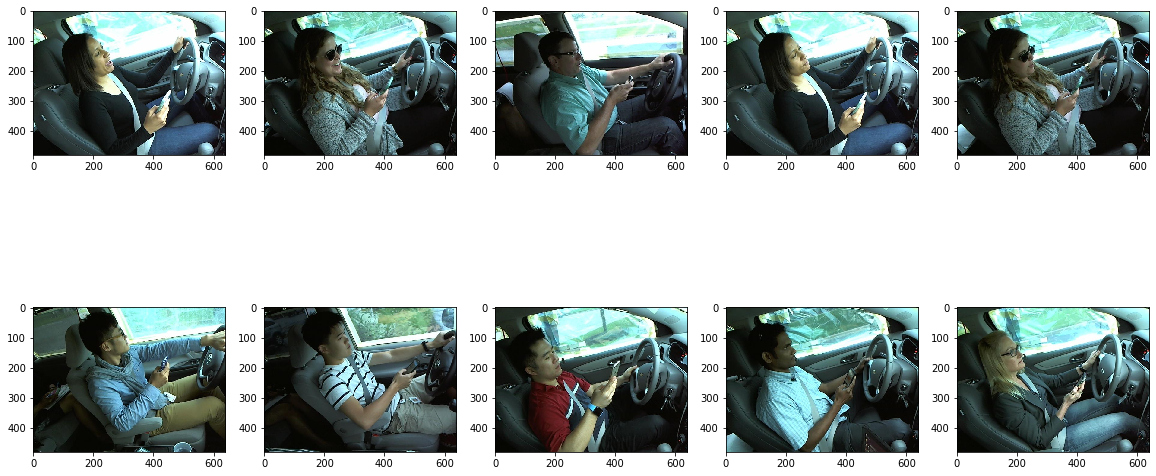

In [146]:
display_image(folder_path, 'c1')

## Sample images of talking on the phone - right:

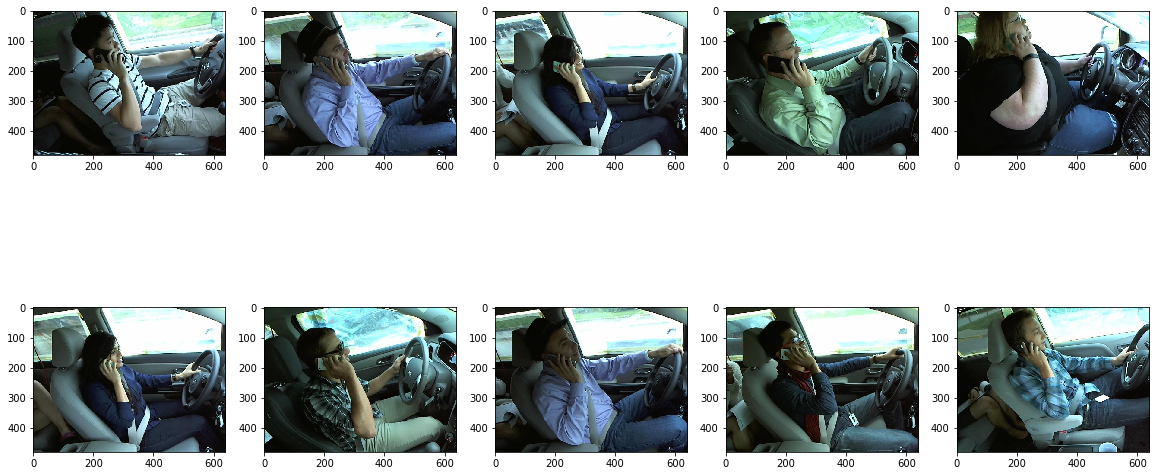

In [148]:
display_image(folder_path, 'c2')

## Sample images of  texting - left:

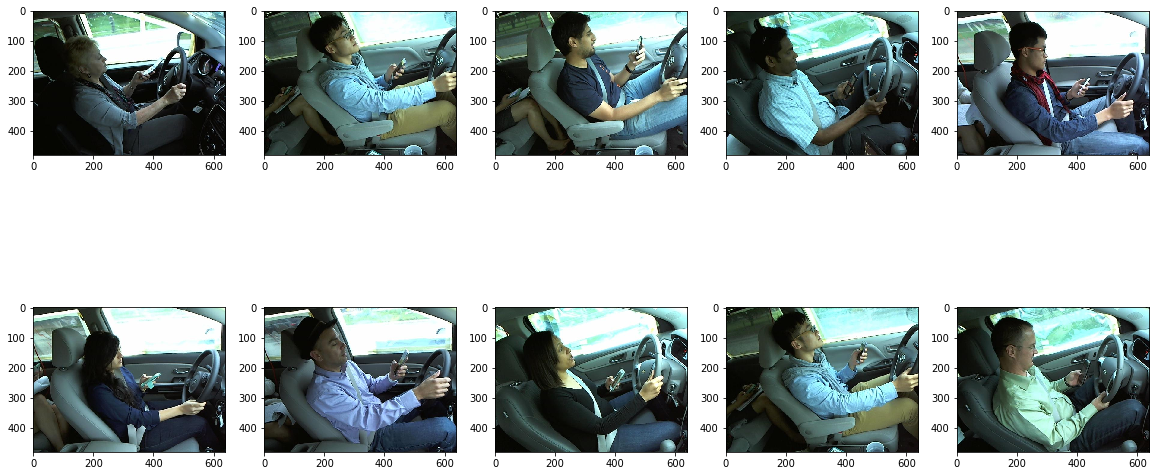

In [149]:
display_image(folder_path, 'c3')

## Sample images of talking on the phone - left

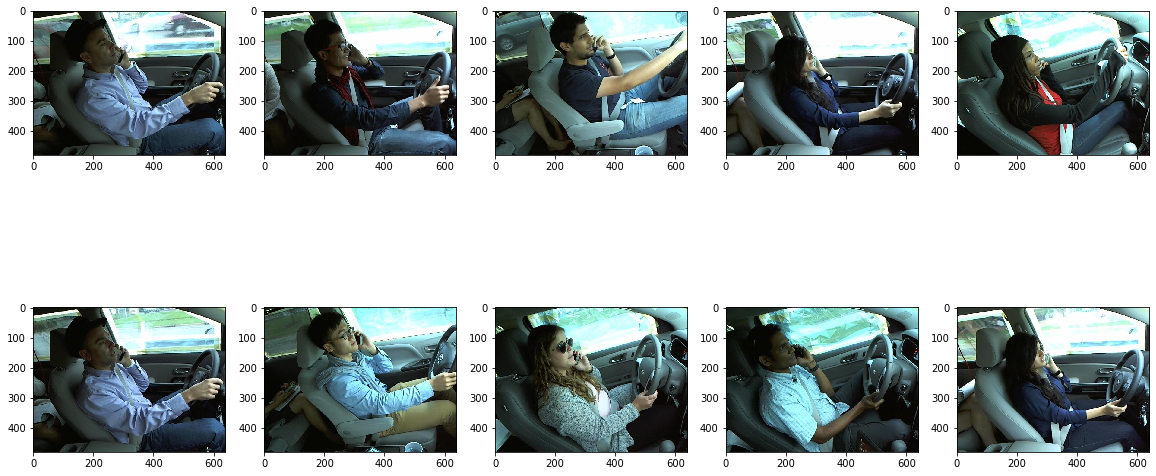

In [151]:
display_image(folder_path, 'c4')

## Sample images of operating the radio

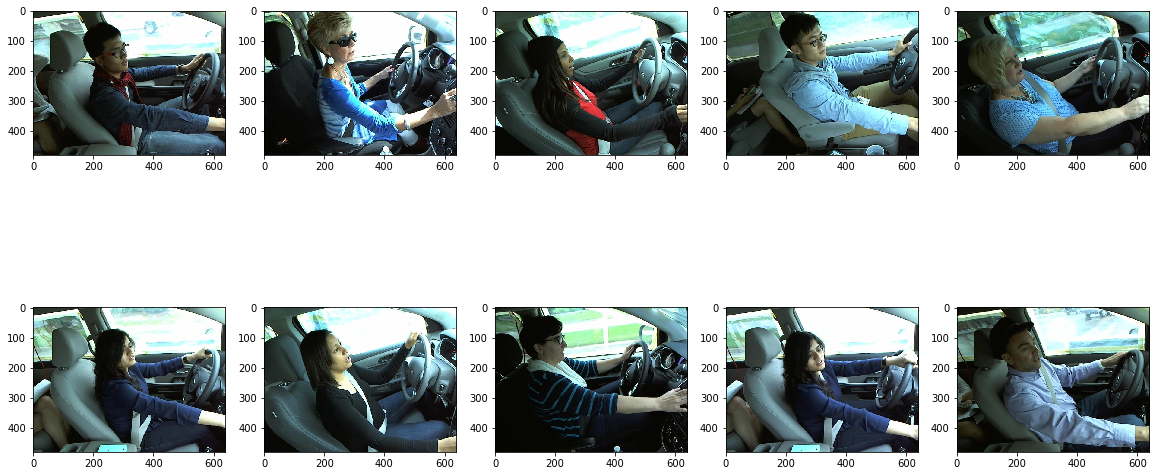

In [152]:
display_image(folder_path, 'c5')

## Sample images of drinking

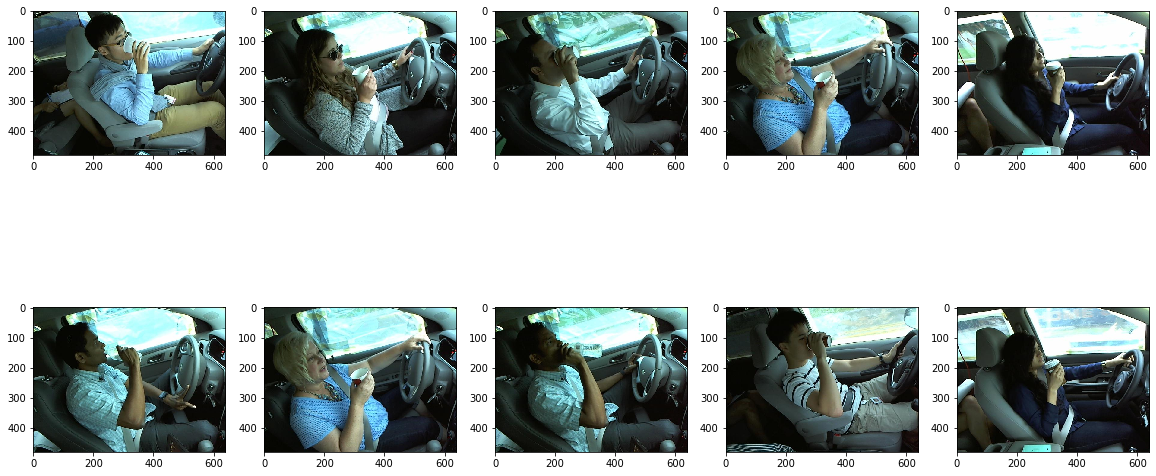

In [153]:
display_image(folder_path, 'c6')

## Sample images of  reaching behind

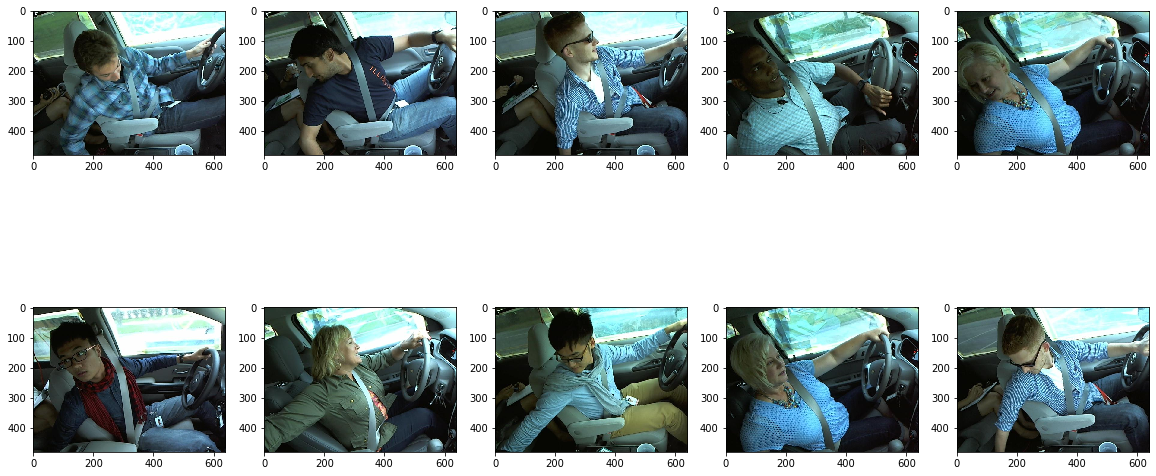

In [154]:
display_image(folder_path, 'c7')

## Sample images of hair and makeup

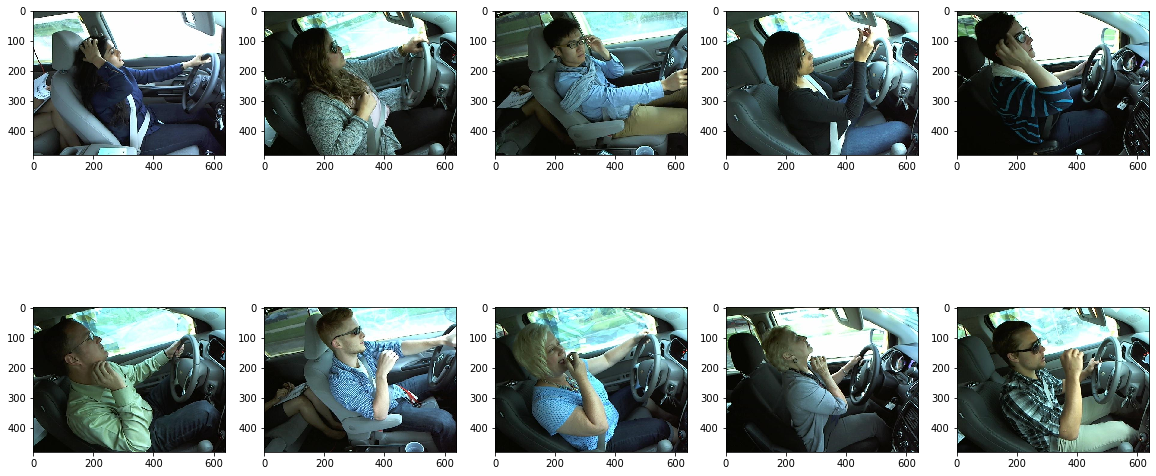

In [155]:
display_image(folder_path, 'c8')

## Sample images of talking to passenger

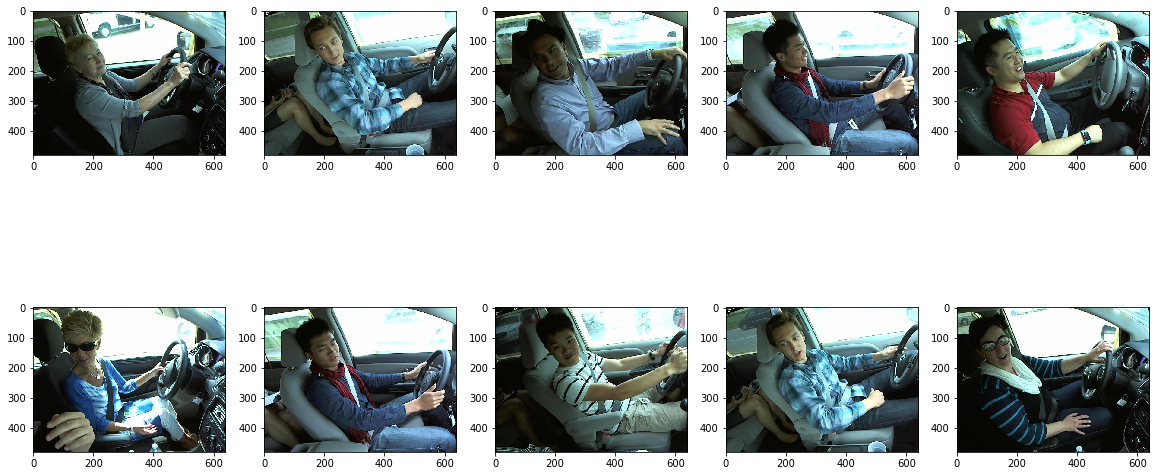

In [156]:
display_image(folder_path, 'c9')

In [30]:
def check_size(folder_path, classes):
    image_attributes = {}
    for classname in classes:
        dim_list = []
        images = list(df.loc[df['classname'] == classname]['img'])
        for img in images:
            im = imread(folder_path + classname + '/' + img)
            dim_list.append(im.shape) # getting image dimension
        image_attributes[classname] = set(dim_list) #getting distint dimenions in particular category
    return image_attributes

Checking for the dimensions of the images in each category:

In [33]:
image_dim = check_size(folder_path, classes)

In [34]:
print(image_dim)

{'c0': {(480, 640, 3)}, 'c1': {(480, 640, 3)}, 'c2': {(480, 640, 3)}, 'c3': {(480, 640, 3)}, 'c4': {(480, 640, 3)}, 'c5': {(480, 640, 3)}, 'c6': {(480, 640, 3)}, 'c7': {(480, 640, 3)}, 'c8': {(480, 640, 3)}, 'c9': {(480, 640, 3)}}


All the images are of the same dimensions i.e. 480x640x3

In [60]:
def pixel_distribution(folder_path, classes):
    color = ('b','g','r')
    for classname in classes:
        images = list(df.loc[df['classname'] == classname]['img'])
        sample_images = random.sample(range(len(images)), 1)
        for img in sample_images:
            img = cv2.imread(folder_path + classname + '/' + images[img])
            for i,col in enumerate(color):
                histr = cv2.calcHist([img],[i],None,[256],[0,256])
                plt.plot(histr,color = col)
                plt.xlim([0,256])
            plt.show()   

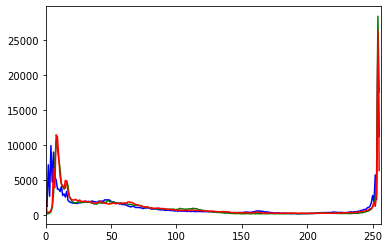

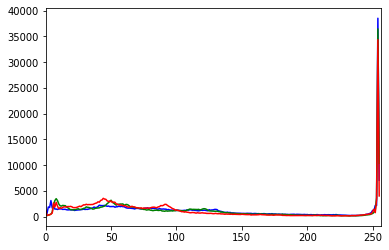

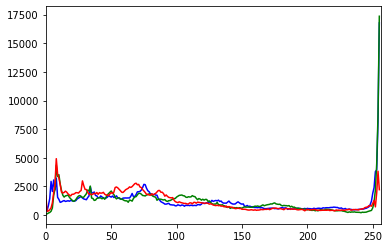

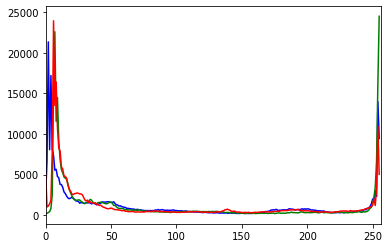

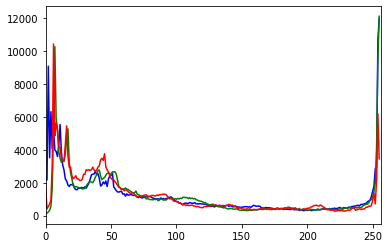

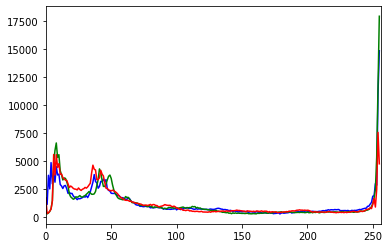

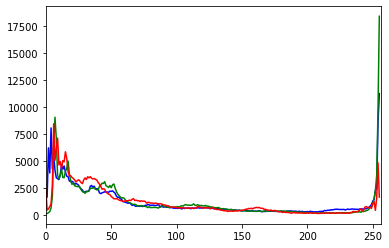

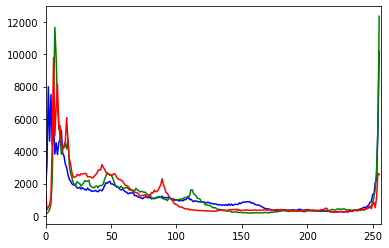

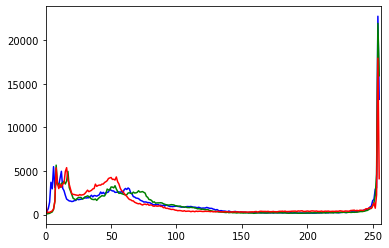

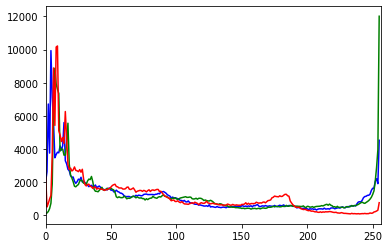

In [61]:
pixel_distribution(folder_path, classes)

#### As can be seen from above plots it looks like for most of the images the pixel distribution across all the three axis is quite similar except for few where particular pixel values are high for some images probably due to T-shirt color or surrounding object's color. 

In [3]:
test_data = df = pd.read_csv("sample_submission.csv")

In [4]:
len(test_data)

79726

There are total 79726 images for testing.